In [1]:
# %load_ext autoreload
# %autoreload 2

# Train simple baseline models on limited, single season data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from src.features.data_engineering import preprocess_single_season, reverse_processing

##### Train on 2020-21 season data

In [2]:
(x_train_2021, y_train_2021), (x_test_2021, y_test_2021), (x_train_2021_target, x_test_2021_target), x_2021_scaler = preprocess_single_season('2020-21')

# (x_train_1617, y_train_1617), (x_test_1617, y_test_1617), (x_train_1617_target, x_test_1617_target), x_1617_scaler = preprocess_single_season('2016-17')

## Train on baseline Dummy model

In [3]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

In [4]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(x_train_2021, y_train_2021)

DummyRegressor()

In [5]:
y_pred_2021 = dummy_regr.predict(x_test_2021)

In [6]:
mean_squared_error(y_pred_2021, y_test_2021)

6.18489872538868

## Train on baseline decision tree model

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
tree_regr = DecisionTreeRegressor()
tree_regr.fit(x_train_2021, y_train_2021)

DecisionTreeRegressor()

In [9]:
y_pred_2021 = tree_regr.predict(x_test_2021)

In [10]:
mean_squared_error(y_pred_2021, y_test_2021)

9.01861551469034

Feature 0: xP, Score: 0.0679
Feature 1: assists, Score: 0.00283
Feature 2: bonus, Score: 0.00339
Feature 3: bps, Score: 0.04059
Feature 4: clean_sheets, Score: 0.00244
Feature 5: creativity, Score: 0.05855
Feature 6: goals_conceded, Score: 0.01292
Feature 7: goals_scored, Score: 0.00047
Feature 8: ict_index, Score: 0.03954
Feature 9: influence, Score: 0.04902
Feature 10: minutes, Score: 0.25192
Feature 11: own_goals, Score: 2e-05
Feature 12: penalties_missed, Score: 0.00269
Feature 13: penalties_saved, Score: 0.0
Feature 14: red_cards, Score: 4e-05
Feature 15: saves, Score: 0.00377
Feature 16: selected, Score: 0.11587
Feature 17: threat, Score: 0.02574
Feature 18: total_points, Score: 0.01411
Feature 19: transfers_balance, Score: 0.07263
Feature 20: transfers_in, Score: 0.07607
Feature 21: transfers_out, Score: 0.0682
Feature 22: value, Score: 0.06303
Feature 23: was_home, Score: 0.00986
Feature 24: yellow_cards, Score: 0.00244
Feature 25: position_DEF, Score: 0.00703
Feature 26: posit

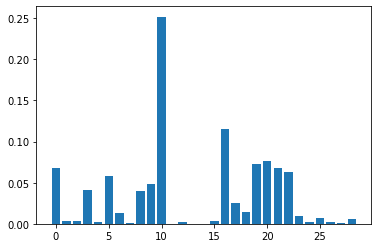

In [11]:
# summarize feature importance
importance = tree_regr.feature_importances_
for i,v in enumerate(importance):
    print(f'Feature {i}: {x_train_2021.columns[i]}, Score: {round(v,5)}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Train on baseline SVR model

In [12]:
from sklearn.svm import LinearSVR

In [13]:
model_svr = LinearSVR()
model_svr.fit(x_train_2021, y_train_2021)

d:\studies\informatyka\semestr_3\fpl_ai_manager\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [14]:
# create series to keep indexes and name same as in the original y data
y_pred_2021 = pd.Series(model_svr.predict(x_test_2021), index=y_test_2021.index, name='predicted_total_points_next_gameweek')

In [15]:
mean_squared_error(y_pred_2021, y_test_2021)

5.208508857692168

## Merge results with footballers extracted target data

In [16]:
x_test_reversed = reverse_processing(x_test_2021, x_2021_scaler, x_test_2021_target)

In [17]:
x_test_reversed_svr = pd.concat([y_pred_2021, x_test_reversed], axis=1)

In [18]:
#preview x_test_reversed sorted by predicted total points descending
x_test_reversed_svr.sort_values(by='predicted_total_points_next_gameweek', ascending=False).head(10)

,predicted_total_points_next_gameweek,name,GW,element,total_points_next_gameweek,xP,assists,bonus,bps,clean_sheets,...,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,position_DEF,position_FWD,position_GK,position_MID
18785,4.168371,Sam Johnstone,31,417,2.0,9.5,0.0,3.0,45.0,1.0,...,937.0,16469.0,15532.0,45.0,1.0,0.0,0.0,0.0,1.0,0.0
451,4.128603,Alisson Ramses Becker,2,252,2.0,8.0,0.0,2.0,41.0,1.0,...,-92351.0,10612.0,102963.0,60.0,0.0,0.0,0.0,0.0,1.0,0.0
21725,4.066503,Edouard Mendy,35,548,0.0,0.0,0.0,3.0,36.0,0.0,...,6142.0,34232.0,28090.0,52.0,0.0,0.0,0.0,0.0,1.0,0.0
22536,3.994964,Scott Carson,36,608,0.0,3.3,0.0,1.0,27.0,0.0,...,-55.0,1047.0,1102.0,39.0,0.0,0.0,0.0,0.0,1.0,0.0
19585,3.116722,Kelechi Iheanacho,32,233,12.0,8.0,0.0,0.0,30.0,1.0,...,712878.0,720792.0,7914.0,60.0,1.0,0.0,0.0,1.0,0.0,0.0
5359,3.106923,Diogo Jota,10,468,1.0,7.7,0.0,2.0,23.0,0.0,...,783351.0,803730.0,20379.0,67.0,0.0,0.0,0.0,0.0,0.0,1.0
1202,3.069687,James RodrÃ­guez,3,508,18.0,5.7,0.0,0.0,16.0,0.0,...,682098.0,806071.0,123973.0,76.0,0.0,0.0,0.0,0.0,0.0,1.0
12160,3.059664,Ilkay GÃ¼ndogan,21,271,8.0,8.8,0.0,0.0,17.0,1.0,...,674097.0,687138.0,13041.0,58.0,1.0,0.0,0.0,0.0,0.0,1.0
15938,3.013583,Dominic Calvert-Lewin,26,164,2.0,9.7,0.0,0.0,0.0,1.0,...,765433.0,811559.0,46126.0,78.0,1.0,0.0,0.0,1.0,0.0,0.0
5047,3.005065,Hakim Ziyech,9,114,2.0,9.8,0.0,0.0,10.0,1.0,...,745737.0,764461.0,18724.0,82.0,0.0,0.0,0.0,0.0,0.0,1.0


## Train on baseline Multi-layer Perceptron model

In [207]:
import tensorflow as tf

In [208]:
model_mlp = tf.keras.models.Sequential()

model_mlp.add(tf.keras.layers.Dense(units=32, activation='relu', input_shape=(x_train_2021.shape[1],)))
model_mlp.add(tf.keras.layers.Dense(units=16, activation='relu'))
model_mlp.add(tf.keras.layers.Dense(units=1, activation='linear'))


In [209]:
model_mlp.compile(optimizer='adam',
                  loss='mse')

In [210]:
history = model_mlp.fit(x_train_2021, y_train_2021,
                        batch_size=4,
                        epochs=30,
                        validation_split=0.2)

Epoch 1/30
3784/3784 [==============================] - 3s 673us/step - loss: 4.6616 - val_loss: 4.0493
Epoch 2/30
3784/3784 [==============================] - 3s 662us/step - loss: 4.4683 - val_loss: 3.9901
Epoch 3/30
3784/3784 [==============================] - 2s 659us/step - loss: 4.4428 - val_loss: 4.0164
Epoch 4/30
3784/3784 [==============================] - 2s 644us/step - loss: 4.4352 - val_loss: 4.0672
Epoch 5/30
3784/3784 [==============================] - 3s 671us/step - loss: 4.4296 - val_loss: 3.9783
Epoch 6/30
3784/3784 [==============================] - 2s 646us/step - loss: 4.4177 - val_loss: 4.0472
Epoch 7/30
3784/3784 [==============================] - 3s 662us/step - loss: 4.4134 - val_loss: 3.9946
Epoch 8/30
3784/3784 [==============================] - 3s 661us/step - loss: 4.4069 - val_loss: 4.0522
Epoch 9/30
3784/3784 [==============================] - 2s 643us/step - loss: 4.3975 - val_loss: 4.0025
Epoch 10/30
3784/3784 [==============================] - 3s 675u

In [211]:
score = model_mlp.evaluate(x_test_2021, y_test_2021, verbose=0)
print('Test loss:', score)

Test loss: 4.728095054626465


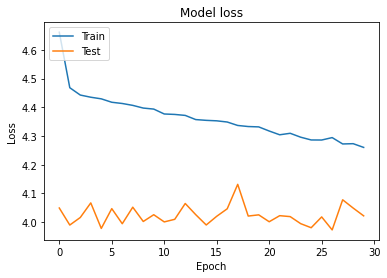

In [212]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

MLP model is achieving the lowest loss value from all baseline models.

In [213]:
y_pred_2021_mlp = pd.Series(model_mlp.predict(x_test_2021).reshape(-1,), index=y_test_2021.index, name='predicted_total_points_next_gameweek')

In [217]:
x_test_reversed_mlp = pd.concat([y_pred_2021_mlp, x_test_reversed], axis=1)
#preview x_test_reversed sorted by predicted total points descending
x_test_reversed_mlp.sort_values(by='predicted_total_points_next_gameweek', ascending=False).head(10)

,predicted_total_points_next_gameweek,name,GW,element,total_points_next_gameweek,xP,assists,bonus,bps,clean_sheets,...,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,position_DEF,position_FWD,position_GK,position_MID
10194,10.181931,Kevin De Bruyne,19,272,0.0,14.0,0.0,0.0,10.0,0.0,...,395204.0,436458.0,41254.0,118.0,1.0,0.0,0.0,0.0,0.0,1.0
451,7.502029,Alisson Ramses Becker,2,252,2.0,8.0,0.0,2.0,41.0,1.0,...,-92351.0,10612.0,102963.0,60.0,0.0,0.0,0.0,0.0,1.0,0.0
14258,7.089135,Ilkay GÃ¼ndogan,24,271,3.0,20.7,0.0,0.0,0.0,0.0,...,788107.0,806253.0,18146.0,60.0,0.0,0.0,0.0,0.0,0.0,1.0
7672,6.132590,Heung-Min Son,14,390,3.0,6.4,0.0,0.0,3.0,0.0,...,154155.0,170409.0,16254.0,97.0,1.0,0.0,0.0,0.0,0.0,1.0
18785,6.088678,Sam Johnstone,31,417,2.0,9.5,0.0,3.0,45.0,1.0,...,937.0,16469.0,15532.0,45.0,1.0,0.0,0.0,0.0,1.0,0.0
1443,6.081779,Sadio ManÃ©,3,251,0.0,8.8,0.0,1.0,22.0,0.0,...,55243.0,122337.0,67094.0,119.0,1.0,1.0,0.0,0.0,0.0,1.0
1412,6.079928,RaÃºl JimÃ©nez,3,460,2.0,4.7,0.0,0.0,-1.0,0.0,...,198215.0,349218.0,151003.0,85.0,0.0,0.0,0.0,1.0,0.0,0.0
15380,5.960415,Timo Werner,26,117,2.0,8.6,0.0,0.0,3.0,0.0,...,-62681.0,28529.0,91210.0,92.0,1.0,0.0,0.0,1.0,0.0,0.0
5716,5.767989,Kevin De Bruyne,11,272,3.0,10.2,1.0,3.0,41.0,1.0,...,308791.0,328451.0,19660.0,117.0,1.0,0.0,0.0,0.0,0.0,1.0
11000,5.742733,Aaron Cresswell,19,435,5.0,13.4,0.0,0.0,14.0,0.0,...,286229.0,317337.0,31108.0,54.0,1.0,0.0,1.0,0.0,0.0,0.0
